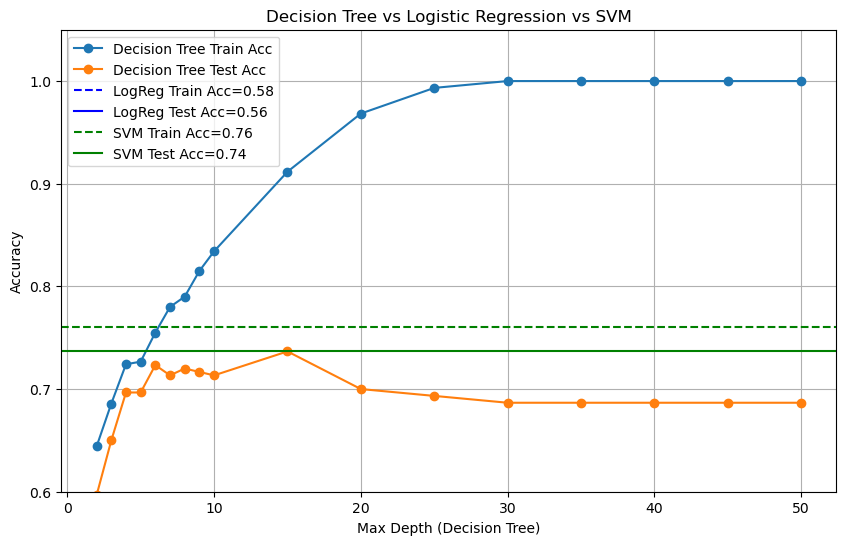

In [2]:
# Lab 4.2 Extension: Compare Decision Tree, Logistic Regression, and SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# -----------------------------
# Step 1: Generate synthetic dataset (same as Lab 4.2)
# -----------------------------
N = 1500
mean1, mean2, mean3 = [6,14], [10,6], [14,14]
cov = [[3.5,0],[0,3.5]]

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# -----------------------------
# Step 2: Decision Tree with different depths
# -----------------------------
depths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
train_acc_dt, test_acc_dt = [], []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_acc_dt.append(dt.score(X_train, y_train))
    test_acc_dt.append(dt.score(X_test, y_test))

# -----------------------------
# Step 3: Logistic Regression
# -----------------------------
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
train_acc_log = log_reg.score(X_train, y_train)
test_acc_log = log_reg.score(X_test, y_test)

# -----------------------------
# Step 4: SVM Classifier
# -----------------------------
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
train_acc_svm = svm_model.score(X_train, y_train)
test_acc_svm = svm_model.score(X_test, y_test)

# -----------------------------
# Step 5: Plot Results
# -----------------------------
plt.figure(figsize=(10,6))

# Decision Tree accuracy vs depth
plt.plot(depths, train_acc_dt, 'o-', label='Decision Tree Train Acc')
plt.plot(depths, test_acc_dt, 'o-', label='Decision Tree Test Acc')

# Logistic Regression (flat line)
plt.axhline(y=train_acc_log, color='blue', linestyle='--', label=f'LogReg Train Acc={train_acc_log:.2f}')
plt.axhline(y=test_acc_log, color='blue', linestyle='-', label=f'LogReg Test Acc={test_acc_log:.2f}')

# SVM (flat line)
plt.axhline(y=train_acc_svm, color='green', linestyle='--', label=f'SVM Train Acc={train_acc_svm:.2f}')
plt.axhline(y=test_acc_svm, color='green', linestyle='-', label=f'SVM Test Acc={test_acc_svm:.2f}')

plt.xlabel("Max Depth (Decision Tree)")
plt.ylabel("Accuracy")
plt.title("Decision Tree vs Logistic Regression vs SVM")
plt.legend()
plt.ylim(0.6, 1.05)
plt.grid(True)
plt.show()